In [9]:
from faker import Faker
import random
import pandas as pd
from random import randrange
from datetime import datetime
import numpy as np

In [10]:
nr_of_trekkers = 10000
# time-stamp
# email, name, height, weight, age, gender, city, locality
# languages, college
# working profession, have you gone trekking
# preference of trek days
# no. of previous treks
# list of treks done
# difficulty of trek
# preferred location of trek
# food preferences

fake = Faker('de_DE')

trekkers = []

In [11]:
# generate a list of ages between 18 and 80 years old, with 1000 entries following a normal distribution
ages = np.random.normal(30, 10, nr_of_trekkers).astype(int)
# generate a list of number of previous treks between 0 and 10, with 1000 entries following a normal distribution
previous_treks = np.random.normal(3, 1, nr_of_trekkers).astype(int)

localities = {
    "Pune":  [
        "Kothrud", "Nal Stop", "Aundh", "Pimpri", "Shivaji Nagar"
    ], # list of localities random 
    "Mumbai": [
        "Bandra", "Andheri", "Borivali", "Ghatkopar", "Kandivali"
    ],
    "Nashik": [
        "Satpur", "Ambad", "Panchavati", "Sadar", "Gangapur"
    ],
    "Kolhapur": [
        "Kagal", "Tarabai Park", "Kasaba Bawada", "D Ward", "Gadhinglaj"
    ],
    "Nagpur": [
        "Kamptee", "Bank Colony", "Kalameshwar", "Reshim Bagh", "Koradi Road"
    ]
}

# list of bias for each city 
#  pune 50% , mumbai 20%, nashik 10%, kolhapur 10%, nagpur 10%
city_bias = [0.5, 0.2, 0.1, 0.1, 0.1]





for customers_id in range(nr_of_trekkers):
    # creating time-stamp:
    d1 = datetime.strptime(f'1/1/2021', '%m/%d/%Y')
    d2 = datetime.strptime(f'12/31/2022', '%m/%d/%Y')
    transaction_date = fake.date_between(d1, d2)
    # create email:
    email = fake.ascii_email()
    # create trekkers name:
    name = fake.name()

    # create height:
    # height should be between 150 and 200 cm with a skewed towards 160cm
    height = np.random.normal(160, 10, 1).astype(int)
    # create weight:
    # weight should be between 50 and 100 kg with a skewed towards 70kg
    weight = np.random.normal(70, 10, 1).astype(int)



    # create age:
    age = ages[customers_id]
    if age < 10:
        age = 30-age
    
    # create gender:
    # 60% male, 40% female

    gender = np.random.choice(["Male","Female"], p=[0.6, 0.4])

    # create city:
    city = np.random.choice(["Pune", "Mumbai", "Nashik", "Kolhapur", "Nagpur"], p=city_bias)
    # create locality:

    locality = np.random.choice(localities[city])

    # choose max 3 min 1 languages
    # 80% Marathi, 50% Hindi, 40% English, 15% other
    languages = np.random.choice(["Marathi", "Hindi", "English", "Other"], p=[0.55, 0.25, 0.1, 0.1], size=random.randint(1,3), replace=False)
    # create college:
    college = np.random.choice(["MIT-WPU", "SPPU", "MIT-ADT", "PCCOE", "PICT", "VIT"])
    # create profession:
    # 80% student, 10% working, 10% unemployed
    profession = np.random.choice(["Student", "Working", "Unemployed"], p=[0.8, 0.1, 0.1])
    # create trekking experience:
    # 70% yes, 30% no
    # create YES/NO:
    # create preference of trek days:
    gone_trekking = np.random.choice(["Y", "N"], p=[0.7, 0.3])
    if gone_trekking == "Y":
        num_treks = previous_treks[customers_id]
    else:
        num_treks = 0

    # preference of trek days monday to sunday, min 1 max 7
    preferred_days = np.random.choice(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], size=np.random.randint(1, 7), p=[0.1, 0.01, 0.03, 0.01, 0.2, 0.3, 0.35], replace=False)
    # list of treks done:
   # prev_treks = random.choice()
    # difficulty of treks:
    difficulty_trek = np.random.choice(["Beginner", "Intermediate", "Experienced"])
    # preferred location of treks:

    # food choice:
    food_choice = np.random.choice(["Non-Veg", "Veg", "Vegan"])


    trekkers.append([email, name, height, weight,age, gender, city, locality, languages, college, profession,
                     gone_trekking, preferred_days, num_treks, difficulty_trek])




In [12]:

trekkers_df = pd.DataFrame(trekkers, columns=['Email-ID', 'Name', 'Height', 'Weight', 'Age', 'Gender', 'City', 'Locality',
                                               'Languages', 'college', 'Profession', 'Have you gone Trekking', 'Preferred Days',
                                               'Number of Treks', 'Difficulty of Trek'])

pd.pandas.set_option('display.max_columns', None)
print(trekkers_df)

                        Email-ID                       Name Height Weight  \
0         ullmannmax@schleich.de         Karlheinz Hoffmann  [142]   [73]   
1     etzoldgiorgio@steinberg.de               Hella Biggen  [151]   [65]   
2     benjamin50@ditschlerin.net               Pero Weitzel  [151]   [73]   
3       hans-guenter35@gmail.com                Ahmed Krein  [157]   [81]   
4          ivoboerner@hotmail.de           Wladimir Hofmann  [166]   [76]   
...                          ...                        ...    ...    ...   
9995        ndrubin@heinrich.net     Antoinette Mühle-Gertz  [169]   [79]   
9996           edit32@heuser.com          Sven Preiß B.Eng.  [147]   [67]   
9997    miesernst-otto@gmail.com  Prof. Meinrad Beier B.Sc.  [143]   [69]   
9998   ullrichrosenow@hoerle.org    Dr. Reginald Säuberlich  [152]   [77]   
9999        nurten99@niemeier.de                  Etta Dörr  [163]   [75]   

      Age  Gender      City       Locality                  Languages  \
0 

<AxesSubplot:>

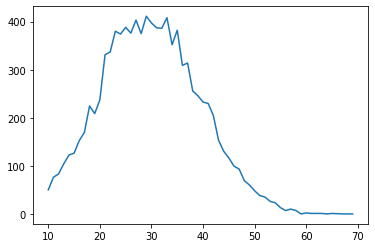

In [13]:
trekkers_df["Age"].value_counts().sort_index().plot(kind="line")

In [14]:
trekkers_df.describe()

,Age,Number of Treks
count,10000.000000,10000.000000
mean,30.012400,1.779400
std,9.351705,1.442409
min,10.000000,0.000000
25%,23.000000,0.000000
50%,30.000000,2.000000
75%,36.000000,3.000000
max,69.000000,6.000000


In [15]:
trekkers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Email-ID                10000 non-null  object
 1   Name                    10000 non-null  object
 2   Height                  10000 non-null  object
 3   Weight                  10000 non-null  object
 4   Age                     10000 non-null  int64 
 5   Gender                  10000 non-null  object
 6   City                    10000 non-null  object
 7   Locality                10000 non-null  object
 8   Languages               10000 non-null  object
 9   college                 10000 non-null  object
 10  Profession              10000 non-null  object
 11  Have you gone Trekking  10000 non-null  object
 12  Preferred Days          10000 non-null  object
 13  Number of Treks         10000 non-null  int64 
 14  Difficulty of Trek      10000 non-null  object
dtypes: 

In [16]:
trekkers_df.to_csv('../Data/trekkers_df_with_bias.csv', index=False)